In [1]:
import pandas as pd
import os

# Carregar o DataFrame limpo
caminho_parquet = os.path.join('..', 'data', 'processed', 'enem_limpo.parquet')
df_limpo = pd.read_parquet(caminho_parquet)

print("DataFrame carregado. Dimensões:", df_limpo.shape)

DataFrame carregado. Dimensões: (2585115, 14)


In [2]:
# 1. Selecionar as colunas que usaremos no modelo
# Vamos usar as notas (exceto a alvo) e as colunas categóricas como features
# A variável alvo (target) é a 'NU_NOTA_MT'
features = [
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
    'Q001', 'Q002', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_ESCOLA', 'TP_LINGUA'
]
alvo = 'NU_NOTA_MT'

# 2. Criar um novo DataFrame apenas com as colunas de interesse
df_para_modelo = df_limpo[features + [alvo]]

# 3. Identificar as colunas categóricas para aplicar o One-Hot Encoding
# Note que TP_LINGUA e TP_ESCOLA já são numéricas, mas representam categorias
colunas_categoricas = ['Q001', 'Q002', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_ESCOLA', 'TP_LINGUA']

# 4. Aplicar o One-Hot Encoding
df_modelo_final = pd.get_dummies(df_para_modelo, columns=colunas_categoricas, drop_first=True)

print("Dimensões do DataFrame após One-Hot Encoding:", df_modelo_final.shape)
print("\nColunas do DataFrame final:")
print(df_modelo_final.columns.tolist())

display(df_modelo_final.head())

Dimensões do DataFrame após One-Hot Encoding: (2585115, 47)

Colunas do DataFrame final:
['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'Q001_B', 'Q001_C', 'Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H', 'Q002_B', 'Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H', 'Q006_B', 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H', 'Q006_I', 'Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q', 'Q022_B', 'Q022_C', 'Q022_D', 'Q022_E', 'Q024_B', 'Q024_C', 'Q024_D', 'Q024_E', 'Q025_B', 'TP_ESCOLA_2', 'TP_ESCOLA_3', 'TP_LINGUA_1']


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,...,Q022_D,Q022_E,Q024_B,Q024_C,Q024_D,Q024_E,Q025_B,TP_ESCOLA_2,TP_ESCOLA_3,TP_LINGUA_1
2,502.0,498.9,475.6,700.0,363.2,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,459.0,508.5,507.2,880.0,466.7,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
4,402.5,379.2,446.9,560.0,338.3,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,564.7,630.3,610.4,600.0,680.2,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
10,644.9,620.2,626.9,860.0,736.3,False,False,False,False,True,...,False,True,True,False,False,False,True,False,False,False


In [4]:
from sklearn.model_selection import train_test_split

# 1. Separar as features (X) da variável alvo (y)
X = df_modelo_final.drop(columns=alvo)
y = df_modelo_final[alvo]

# 2. Fazer a divisão em treino e teste
# Usamos random_state para garantir que a divisão seja sempre a mesma, tornando nosso resultado reprodutível
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% dos dados para teste
    random_state=42 # O número 42 é uma convenção popular, qualquer número serve
)

print("Divisão concluída:")
print(f"Tamanho de X_train (features de treino): {X_train.shape}")
print(f"Tamanho de X_test (features de teste): {X_test.shape}")
print(f"Tamanho de y_train (alvo de treino): {y_train.shape}")
print(f"Tamanho de y_test (alvo de teste): {y_test.shape}")

Divisão concluída:
Tamanho de X_train (features de treino): (2068092, 46)
Tamanho de X_test (features de teste): (517023, 46)
Tamanho de y_train (alvo de treino): (2068092,)
Tamanho de y_test (alvo de teste): (517023,)


In [5]:
import lightgbm as lgb
import time

# 1. Instanciar o modelo
# Usamos o LGBMRegressor pois nosso problema é de regressão (prever um número)
lgbm_regressor = lgb.LGBMRegressor(random_state=42)

# 2. Treinar o modelo
print("Iniciando o treinamento do modelo LightGBM...")
start_time = time.time()

# Usamos %%time para medir o tempo de execução da célula
lgbm_regressor.fit(X_train, y_train)

end_time = time.time()
print(f"Treinamento concluído! Tempo total: {end_time - start_time:.2f} segundos.")

# 3. Fazer previsões no conjunto de teste
print("\nRealizando previsões no conjunto de teste...")
y_pred = lgbm_regressor.predict(X_test)
print("Previsões concluídas.")

Iniciando o treinamento do modelo LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 2068092, number of used features: 46
[LightGBM] [Info] Start training from score 537.745077
Treinamento concluído! Tempo total: 13.42 segundos.

Realizando previsões no conjunto de teste...
Previsões concluídas.


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular as métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Avaliação do Modelo ---")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print("--------------------------")

# Interpretação
print(f"\nNosso modelo erra, em média, {rmse:.2f} pontos na nota de matemática.")
print(f"Nosso modelo consegue explicar {r2:.2%} da variação nas notas de matemática do conjunto de teste.")


--- Avaliação do Modelo ---
RMSE (Raiz do Erro Quadrático Médio): 76.66
R² (Coeficiente de Determinação): 0.6548
--------------------------

Nosso modelo erra, em média, 76.66 pontos na nota de matemática.
Nosso modelo consegue explicar 65.48% da variação nas notas de matemática do conjunto de teste.


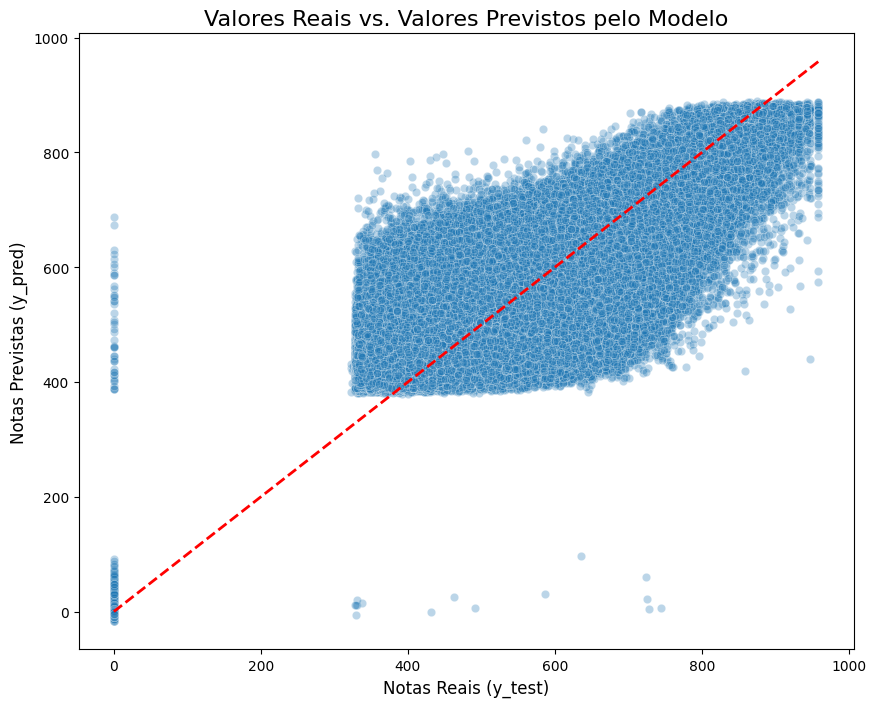

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)

# Adicionando uma linha de referência para a previsão perfeita (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

plt.title('Valores Reais vs. Valores Previstos pelo Modelo', fontsize=16)
plt.xlabel('Notas Reais (y_test)', fontsize=12)
plt.ylabel('Notas Previstas (y_pred)', fontsize=12)
plt.show()

In [8]:
import joblib
import os

# Criar a pasta para salvar o modelo, se não existir
caminho_modelos = os.path.join('..', 'models')
os.makedirs(caminho_modelos, exist_ok=True)

# Salvar o modelo treinado
caminho_modelo_final = os.path.join(caminho_modelos, 'modelo_enem_lgbm.joblib')
joblib.dump(lgbm_regressor, caminho_modelo_final)

print(f"Modelo salvo com sucesso em: {caminho_modelo_final}")

Modelo salvo com sucesso em: ..\models\modelo_enem_lgbm.joblib


In [9]:
import joblib
import os

# X foi o nosso DataFrame de features antes da divisão
model_columns = X.columns

# Criar o caminho para a pasta de modelos
caminho_modelos = os.path.join('..', 'models')
os.makedirs(caminho_modelos, exist_ok=True)

caminho_colunas = os.path.join(caminho_modelos, 'model_columns.joblib')
joblib.dump(model_columns, caminho_colunas)

print("Colunas do modelo salvas com sucesso!")

Colunas do modelo salvas com sucesso!
